In [1]:
import os
import sys

current_dir = os.path.dirname(os.getcwd())
sys.path.append(current_dir)

In [2]:
from kilter_holds import KilterHolds
from node_feature_extractor import NodeFeatureExtractor

Climb hold colors reset to default.
Climb hold type reset to default.
Data loaded and preprocessed successfully.
Climb hold colors reset to default.
Climb hold type reset to default.
Custom colors and types applied.


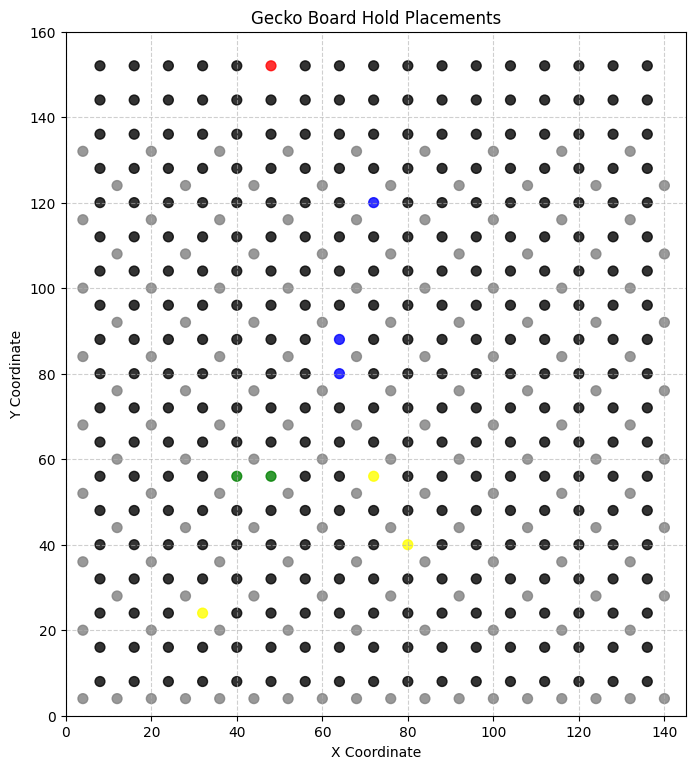

In [3]:
raw_data_dir = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), 'raw')
holds = KilterHolds(raw_data_dir)

my_string = 'p1253r12p1269r12p1290r13p1342r13p1375r13p1388r14p1498r15p1508r15p1527r15'
my_string = 'p1110r15p1150r15p1179r12p1180r12p1183r15p1233r13p1250r13p1319r13p1384r14'
color_map = {
        'r12': 'green',
        'r13': 'blue',
        'r14': 'red',
        'r15': 'yellow'
    }

holds.apply_climb(my_string)

holds.plot_gecko_board()

In [4]:
holds._reset_to_default_colors()
processed_dir = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), 'processed')
holds.save_default_board_to_csv(os.path.join(processed_dir, "kilterHoldsDefault.csv"))

Climb hold colors reset to default.
Default board data saved to c:\Users\mdaman\CodeProjects\ai_Kilter_Routes\data\processed\kilterHoldsDefault.csv


In [5]:
processed_dir = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), 'processed')
kilter_holds_csv_path=os.path.join(processed_dir, "kilterHoldsDefault.csv")

extractor = NodeFeatureExtractor(kilter_holds_csv_path=os.path.join(processed_dir, "kilterHoldsDefault.csv"))

Loaded data from c:\Users\mdaman\CodeProjects\ai_Kilter_Routes\data\processed\kilterHoldsDefault.csv
Filtered data for Gecko board.
Normalized 'x' and 'y' coordinates.
One-hot encoded categorical columns: ['default_hold_color', 'climb_hold_type']
Populated node features dictionary.
Created node feature dataframe and matrix.


In [6]:
holds.apply_climb(my_string)
extractor = NodeFeatureExtractor(holds.gecko_board_df)

Climb hold colors reset to default.
Climb hold type reset to default.
Custom colors and types applied.
Loaded data from climbing route dataframe
Filtered data for Gecko board.
Normalized 'x' and 'y' coordinates.
One-hot encoded categorical columns: ['default_hold_color', 'climb_hold_type']
Populated node features dictionary.
Created node feature dataframe and matrix.


In [7]:
node_features_dict = extractor.get_node_features_dict()
node_feature_matrix = extractor.get_node_feature_matrix()

In [8]:
extractor.node_feature_df

,x_normalized,y_normalized,use_frequency,default_hold_color_black,default_hold_color_gray,climb_hold_type_unused,climb_hold_type_foot,climb_hold_type_handFoot,climb_hold_type_start,climb_hold_type_finish
0,1.000000,0.000000,0,False,True,True,False,False,False,False
1,0.970588,0.027027,0,True,False,True,False,False,False,False
2,0.941176,0.000000,0,False,True,True,False,False,False,False
3,0.911765,0.027027,0,True,False,True,False,False,False,False
4,0.882353,0.000000,0,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
519,1.000000,0.810811,0,False,True,True,False,False,False,False
520,0.970588,0.837838,0,True,False,True,False,False,False,False
521,0.970588,0.891892,0,True,False,True,False,False,False,False
522,0.970588,0.945946,0,True,False,True,False,False,False,False


In [9]:
raw_data_dir = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), 'raw')
holds = KilterHolds(raw_data_dir)

holds.apply_climb(my_string)

climb_df = holds.merged_df

climb_df[climb_df["climb_hold_type"] == "foot"]
climb_df

Climb hold colors reset to default.
Climb hold type reset to default.
Data loaded and preprocessed successfully.
Climb hold colors reset to default.
Climb hold type reset to default.
Custom colors and types applied.


,placement_id,hole_id,layout_id,set_id,x,y,default_role_id,default_hold_color,climb_hold_color,default_hold_type,climb_hold_type,use_frequency
0,1447,1133,1,20,140,4,15.0,gray,gray,unused,unused,0
1,1073,1134,1,1,136,8,13.0,black,black,unused,unused,0
2,1448,1135,1,20,132,4,15.0,gray,gray,unused,unused,0
3,1074,1136,1,1,128,8,13.0,black,black,unused,unused,0
4,1449,1137,1,20,124,4,15.0,gray,gray,unused,unused,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3768,4841,4422,1,20,148,116,15.0,gray,gray,unused,unused,0
3769,4842,4423,1,20,164,116,15.0,gray,gray,unused,unused,0
3770,4843,4424,1,20,156,124,15.0,gray,gray,unused,unused,0
3771,4844,4425,1,20,148,132,15.0,gray,gray,unused,unused,0


In [10]:
climb_extractor = NodeFeatureExtractor(climb_df)
climb_extractor.node_feature_df.loc[390]

Loaded data from climbing route dataframe
Filtered data for Gecko board.
Normalized 'x' and 'y' coordinates.
One-hot encoded categorical columns: ['default_hold_color', 'climb_hold_type']
Populated node features dictionary.
Created node feature dataframe and matrix.


x_normalized                0.764706
y_normalized                 0.27027
use_frequency                      0
default_hold_color_black       False
default_hold_color_gray         True
climb_hold_type_unused          True
climb_hold_type_foot           False
climb_hold_type_handFoot       False
climb_hold_type_start          False
climb_hold_type_finish         False
Name: 390, dtype: object

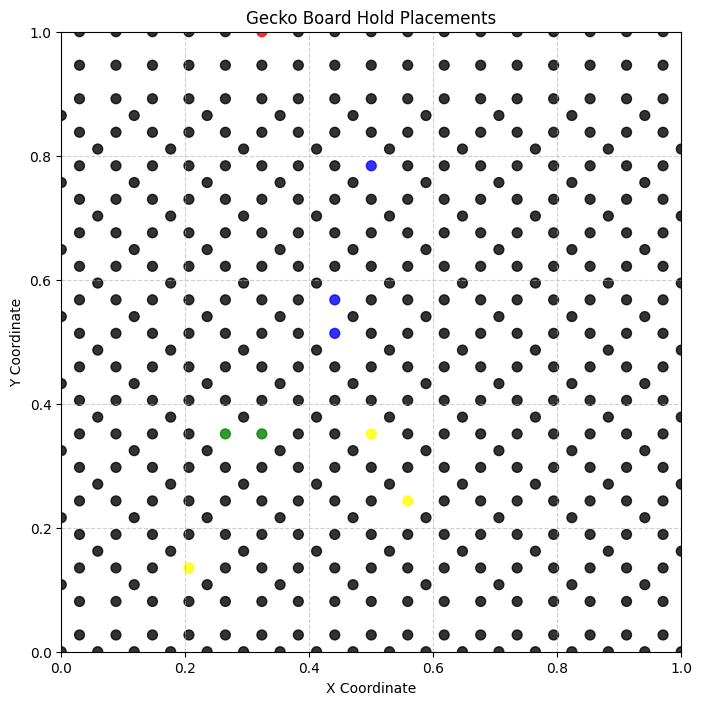

In [11]:
extractor.plot_board()